# CREATE VERIABLES OF TOTAL VARIATION

In [41]:
# CREATE VERIABLE OF TOTAL VARIATION, by including plots it can be checked if they are monotonous or not
variable = 'area_occupancy_current2'

outcome = new_outcomes[variable]
total_variation = []
total_range = []
x = 0
for exp in range(len(outcome)):
    sum_exp = 0
    total_variation_exp = 0
    abs_growth_exp = abs(outcome[exp][0] - outcome[exp][39])
    range_exp = abs(np.max(outcome[exp]) - np.min(outcome[exp]))
    
    for t in range(len(outcome[exp])-1):
        var = abs(outcome[exp][t+1] - outcome[exp][t])
        sum_exp = sum_exp + var
    total_variation_exp = sum_exp / abs_growth_exp
    total_variation.append(total_variation_exp)
    total_range.append(range_exp)

In [42]:
# CREATE VERIABLE OF TOTAL VARIATION, by including plots it can be checked if they are monotonous or not
variable = 'mean_area_occupancy_current'

outcome = new_outcomes[variable]
total_variation = []
total_range = []
x = 0
for exp in range(len(outcome)):
    sum_exp = 0
    total_variation_exp = 0
    abs_growth_exp = abs(outcome[exp][0] - outcome[exp][39])
    range_exp = abs(np.max(outcome[exp]) - np.min(outcome[exp]))
    
    for t in range(len(outcome[exp])-1):
        var = abs(outcome[exp][t+1] - outcome[exp][t])
        sum_exp = sum_exp + var
    total_variation_exp = sum_exp / abs_growth_exp
    total_variation.append(total_variation_exp)
    total_range.append(range_exp)
new_outcomes['total_variation_' + variable] = np.array(total_variation)
new_outcomes['total_range_' + variable] = np.array(total_range)

In [43]:
# CREATE VERIABLE OF TOTAL VARIATION, by including plots it can be checked if they are monotonous or not
variable = 'coal_throughput_Rdam_current'
outcome = new_outcomes[variable]
total_variation = []
total_range = []
x = 0
for j in range(len(outcome)):
    sum_i = 0
    total_variation_i = 0
    abs_growth_i = abs(outcome[j][0] - outcome[j][39])
    range_i = abs(np.max(outcome[j]) - np.min(outcome[j]))
    for i in range(len(outcome[j])-1):
        var = abs(outcome[j][i+1] - outcome[j][i])
        sum_i = sum_i + var
    total_variation_i = sum_i / abs_growth_i
    total_variation.append(total_variation_i)
    total_range.append(range_i)
new_outcomes['total_variation_' + variable] = np.array(total_variation)
new_outcomes['total_range_' + variable] = np.array(total_variation)

In [46]:
# CREATE VERIABLE OF TOTAL VARIATION, by including plots it can be checked if they are monotonous or not
variable = 'sum_area_capacity_current'
outcome = new_outcomes[variable]
total_growth = []

x = 0
for j in range(len(outcome)):
    sum_i = 0
    total_variation_i = 0
    growth_i = outcome[j][39] - outcome[j][0]
    total_growth.append(growth_i)
new_outcomes['total_capacity_growth'] = np.array(total_growth)

# PRIM COAL TP

[EMA/INFO/MainProcess] 1000 points remaining, containing 180 cases of interest


180.0
180.0


[EMA/INFO/MainProcess] mean: 0.9620253164556962, mass: 0.079, coverage: 0.4222222222222222, density: 0.9620253164556962 restricted_dimensions: 6


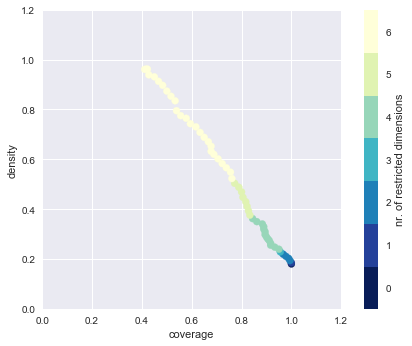

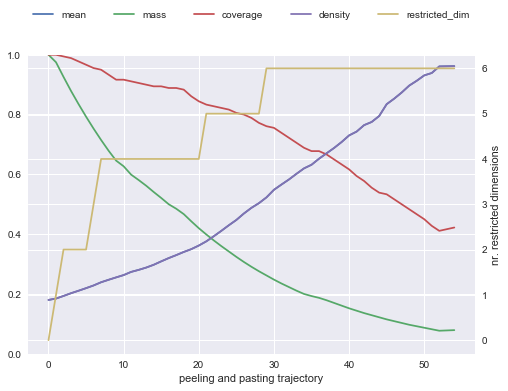

coverage    0.422222
density     0.962025
mass           0.079
mean        0.962025
res dim            6
Name: 54, dtype: object

                               box 54                         
                                  min        max     qp values
market_share_base_growth_f  -0.000188   0.019962  2.059852e-16
u                           17.000000  38.000000  5.725732e-16
a                            0.085197   0.199870  2.033287e-11
c                            0.165718   0.709271  1.241404e-05
other_grey_share_growth_f   -0.014979   0.004910  1.571117e-05
energy_demand_growth_f      -0.005101   0.012996  5.326569e-02



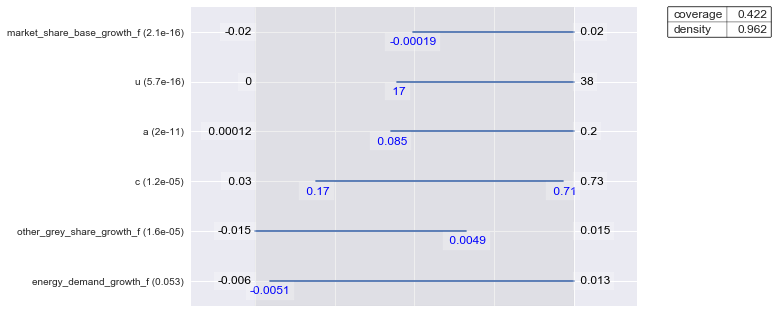

In [65]:
def classify(new_outcomes):
    variable1 = 'total_variation_coal_throughput_Rdam_current'
    variable2 = 'coal_throughput_Rdam_current'
    
    outcome1 = new_outcomes[variable1]
    outcome2 = new_outcomes[variable2]
    
    outcome2_1 = outcome2[:,1]
    outcome2_2 = outcome2[:,2]
    
    logical1 = outcome1 >= 1.05
    logical2 = outcome2_1 <= outcome2_2

    classes = np.zeros(outcome1.shape[0])
    classes[logical1 & logical2] = 1
    return classes

x = experiments
y = classify(new_outcomes)

prim_obj = prim.MultiBoxesPrim(x,y, threshold=0.5)
box1 = prim_obj.find_box()

box1.show_tradeoff()
plt.show()
box1.show_ppt()
plt.show()
box1.inspect()
box1.inspect(style='graph')
plt.show()
